In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [50]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [51]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date_str = most_recent_date[0]
print(most_recent_date_str)


2017-08-23


In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
if most_recent_date_str:

# Calculate the date one year from the last date in data set.
    twelve_months_ago = dt.datetime.strptime(most_recent_date_str, "%Y-%m-%d") - dt.timedelta(days=365)
    print(twelve_months_ago)

# Perform a query to retrieve the data and precipitation scores
    precipitation_data = session.query(measurement.date, measurement.prcp)\
        .filter(measurement.date >= twelve_months_ago)\
        .order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
    df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
display(df)



2016-08-23 00:00:00


,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [55]:
display(df)


precipitation_dictionary = df.set_index("Date")["Precipitation"].to_dict()

print(precipitation_dictionary)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


{'2016-08-24': 1.45, '2016-08-25': 0.11, '2016-08-26': 0.01, '2016-08-27': nan, '2016-08-28': 2.07, '2016-08-29': 0.9, '2016-08-30': 0.05, '2016-08-31': 2.46, '2016-09-01': 0.01, '2016-09-02': 0.03, '2016-09-03': 1.0, '2016-09-04': 0.44, '2016-09-05': 0.18, '2016-09-06': 1.0, '2016-09-07': 1.35, '2016-09-08': 0.15, '2016-09-09': 0.35, '2016-09-10': 1.16, '2016-09-11': 0.6, '2016-09-12': 1.04, '2016-09-13': 1.2, '2016-09-14': 6.7, '2016-09-15': 3.35, '2016-09-16': 0.61, '2016-09-17': 0.23, '2016-09-18': 0.42, '2016-09-19': 0.25, '2016-09-20': 0.43, '2016-09-21': 1.02, '2016-09-22': 0.75, '2016-09-23': 0.33, '2016-09-24': 0.27, '2016-09-25': 0.04, '2016-09-26': 1.02, '2016-09-27': 1.0, '2016-09-28': 0.05, '2016-09-29': 1.49, '2016-09-30': 0.38, '2016-10-01': 1.02, '2016-10-02': 0.61, '2016-10-03': 0.46, '2016-10-04': 3.46, '2016-10-05': 0.81, '2016-10-06': 0.04, '2016-10-07': 0.01, '2016-10-08': 0.04, '2016-10-09': 0.0, '2016-10-10': 0.0, '2016-10-11': 0.35, '2016-10-12': 0.02, '2016-10-

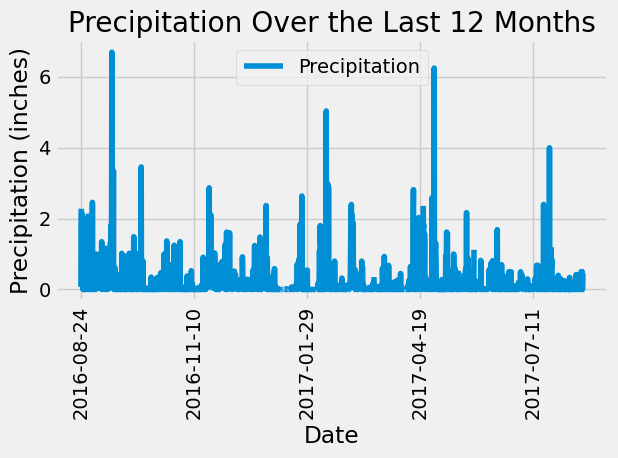

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title = "Precipitation Over the Last 12 Months", x = "Date", rot = 90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()



In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
from sqlalchemy import func, distinct
total_stations = session.query(func.count(distinct(measurement.station))).scalar()
distinct_stations = session.query(measurement.station).distinct().all()
print(distinct_stations)
print(total_stations)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]
9


In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.station).label('station_count'))\
                        .group_by(measurement.station)\
                        .order_by(func.count(measurement.station).desc())\
                        .all()

for station, count in station_counts:
    print(f"Station {station}: {count} rows")


Station USC00519281: 2772 rows
Station USC00519397: 2724 rows
Station USC00513117: 2709 rows
Station USC00519523: 2669 rows
Station USC00516128: 2612 rows
Station USC00514830: 2202 rows
Station USC00511918: 1979 rows
Station USC00517948: 1372 rows
Station USC00518838: 511 rows


In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()

print(f"Lowest Temp: {lowest_temp}\n" f"Highest Temp: {highest_temp} \n" f"Average Temp: {average_temp}")

Lowest Temp: 54.0
Highest Temp: 85.0 
Average Temp: 71.66378066378067


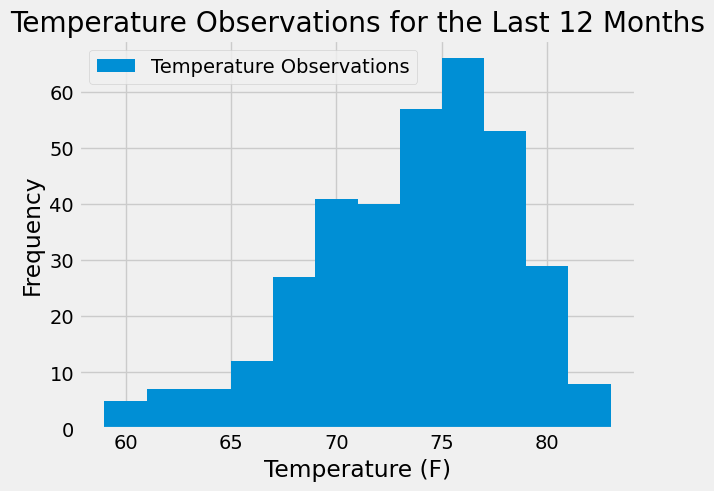

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(measurement.station, func.count(measurement.station).label('station_count'))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc())\
    .first()

if most_active_station:
    most_active_station_id = most_active_station[0]

    # Calculate the date one year from the last date in the data set
    one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
    one_year_ago_scalar = one_year_ago[0].strftime('%Y-%m-%d')  # Convert to string

    # Query the last 12 months of temperature observation data for the most active station
    last_12_months_temps = session.query(measurement.date, measurement.tobs)\
    .filter(measurement.station == most_active_station_id)\
    .filter(measurement.date >= one_year_ago_scalar)\
    .all()

    # Create a DataFrame from the query results
    df_temps = pd.DataFrame(last_12_months_temps, columns=['Date', 'Temperature'])

    # Plot the results as a histogram
    plt.hist(df_temps['Temperature'], bins=12, label='Temperature Observations')
    plt.xlabel('Temperature (F)')
    plt.ylabel('Frequency')
    plt.title('Temperature Observations for the Last 12 Months')
    plt.legend()
    plt.show()
else:
    print("No active stations found.")

# Close Session

In [62]:
# Close Session
session.close()